In [ ]:
# Matt Caraher
# 4/5/2022
# Project 5 P1

In [4]:
library(readr)

# Company_data contains amounts spent on different types of advertisements and the resulting Sales
companyDF <- read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%205/Company_data.csv", show_col_types = FALSE)


In [5]:
# Display first 10 rows
head(companyDF, 10)


TV,Radio,Newspaper,Sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2
57.5,32.8,23.5,11.8
120.2,19.6,11.6,13.2
8.6,2.1,1.0,4.8


In [24]:
# Install requirement for describing dataframe
install.packages("Hmisc")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlTable’




In [25]:
# Describe dataframe
library(Hmisc)
describe(companyDF)


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




companyDF 

 4  Variables      200  Observations
--------------------------------------------------------------------------------
TV 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     200        0      190        1      147    99.19    13.20    24.88 
     .25      .50      .75      .90      .95 
   74.38   149.75   218.82   261.44   280.74 

lowest :   0.7   4.1   5.4   7.3   7.8, highest: 289.7 290.7 292.9 293.6 296.4
--------------------------------------------------------------------------------
Radio 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     200        0      167        1    23.26    17.16    1.995    3.400 
     .25      .50      .75      .90      .95 
   9.975   22.900   36.525   43.520   46.810 

lowest :  0.0  0.3  0.4  0.8  1.3, highest: 47.8 48.9 49.0 49.4 49.6
--------------------------------------------------------------------------------
Newspaper 
       n  missing distinct     Info     Mean      Gmd      .

In [101]:
# Compute Pearson's R between pairs of attributes
cor.test(companyDF$Sales, companyDF$Sales, method = "pearson")
print("---------------------------------------------------------")
cor.test(companyDF$Sales, companyDF$Newspaper, method = "pearson")
print("---------------------------------------------------------")
cor.test(companyDF$Sales, companyDF$Radio, method = "pearson")
print("---------------------------------------------------------")
cor.test(companyDF$Sales, companyDF$TV, method = "pearson")

# TV has the highest correlation to Sales


	Pearson's product-moment correlation

data:  companyDF$Sales and companyDF$Sales
t = Inf, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 1 1
sample estimates:
cor 
  1 


[1] "---------------------------------------------------------"



	Pearson's product-moment correlation

data:  companyDF$Sales and companyDF$Newspaper
t = 2.251, df = 198, p-value = 0.02549
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01964964 0.29033813
sample estimates:
    cor 
0.15796 


[1] "---------------------------------------------------------"



	Pearson's product-moment correlation

data:  companyDF$Sales and companyDF$Radio
t = 5.2512, df = 198, p-value = 3.883e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2216415 0.4657781
sample estimates:
      cor 
0.3496311 


[1] "---------------------------------------------------------"



	Pearson's product-moment correlation

data:  companyDF$Sales and companyDF$TV
t = 29.26, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8714251 0.9243707
sample estimates:
      cor 
0.9012079 


In [100]:

corr_matrix <- cor(companyDF[ , colnames(companyDF)], companyDF$Sales)

corr_matrix

TV,0.9012079
Radio,0.3496311
Newspaper,0.1579600
Sales,1.0000000


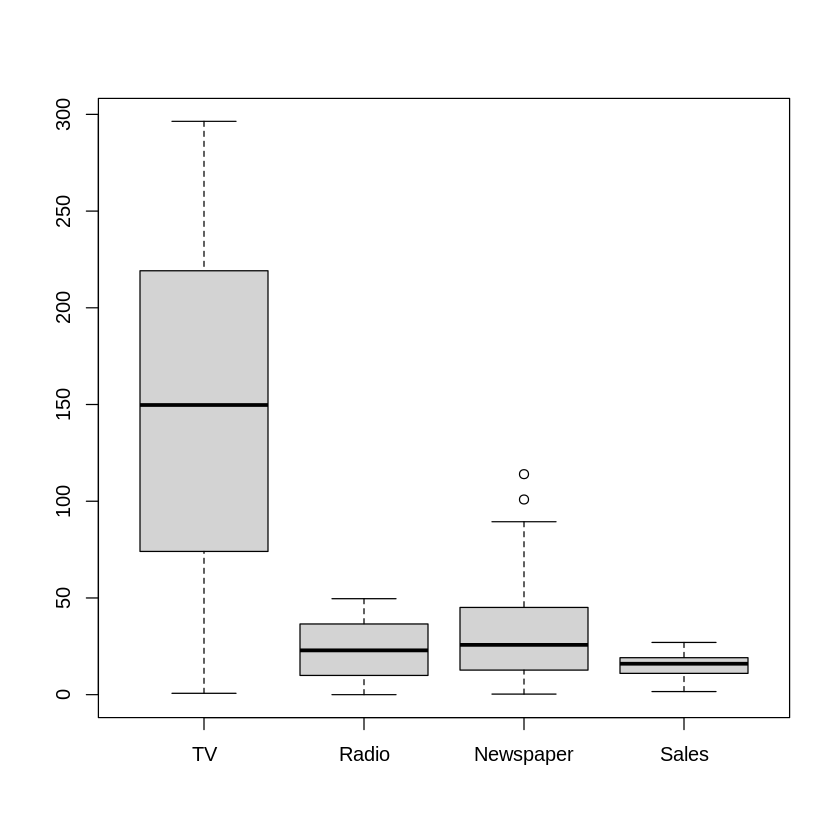

In [99]:
# Create boxplot of companyDF

boxplot(companyDF)

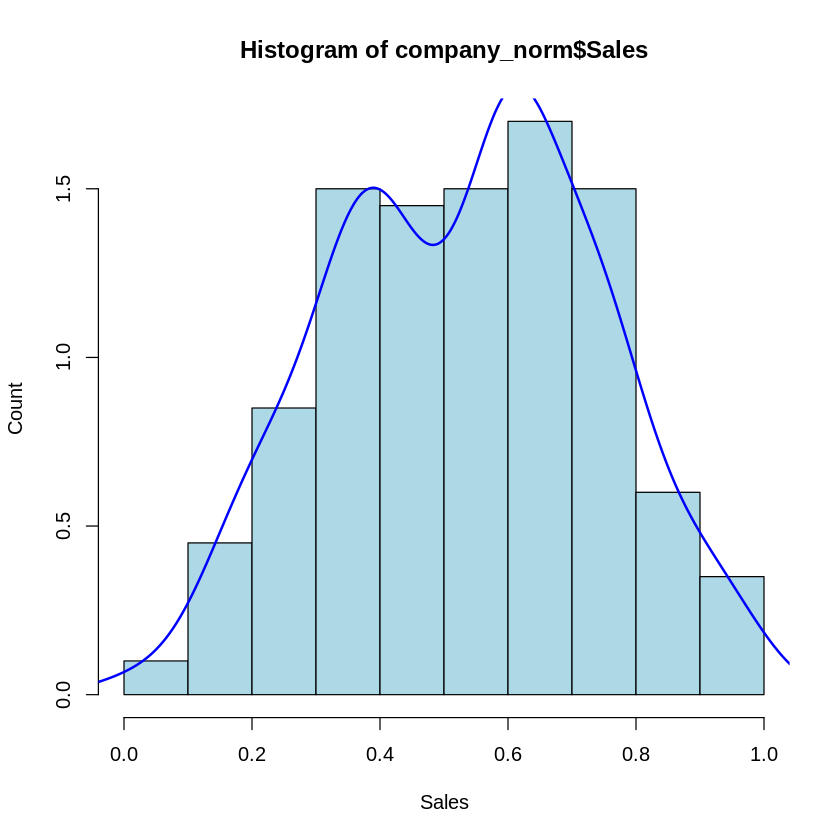

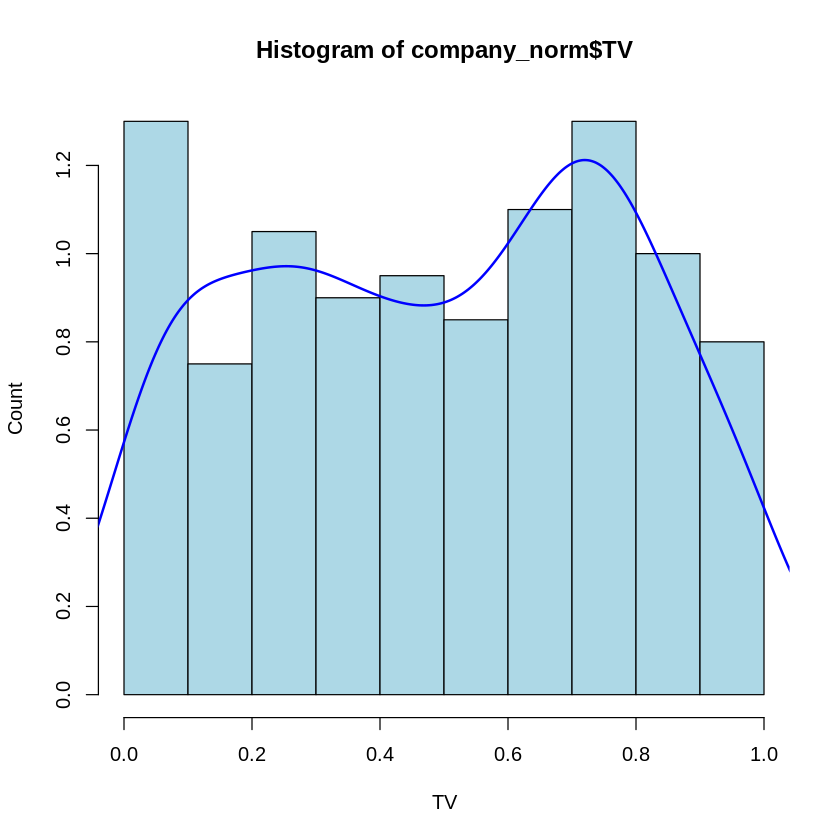

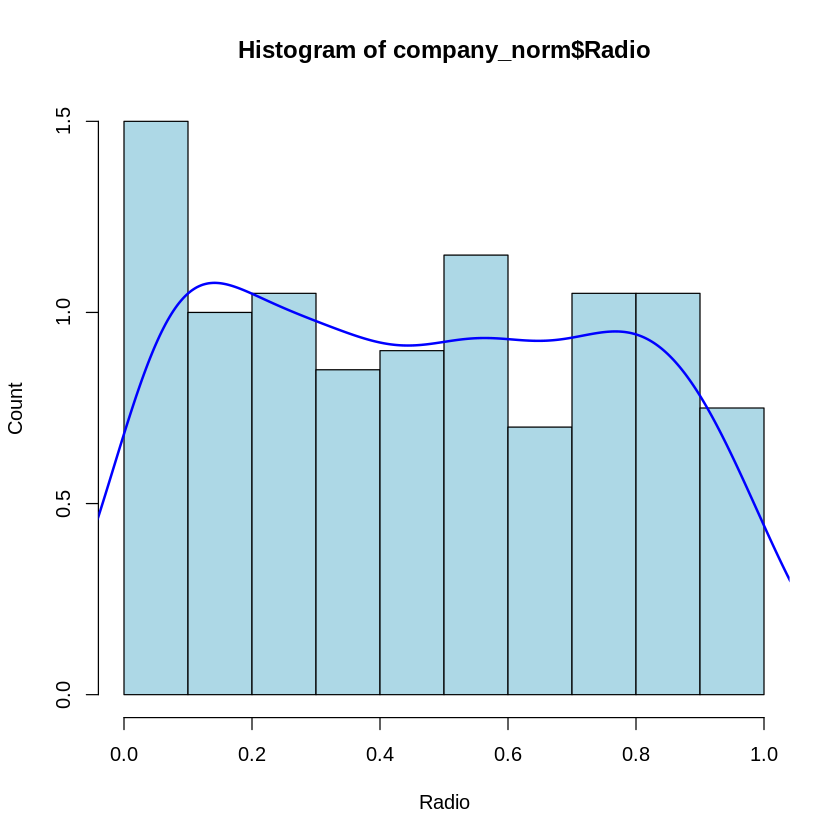

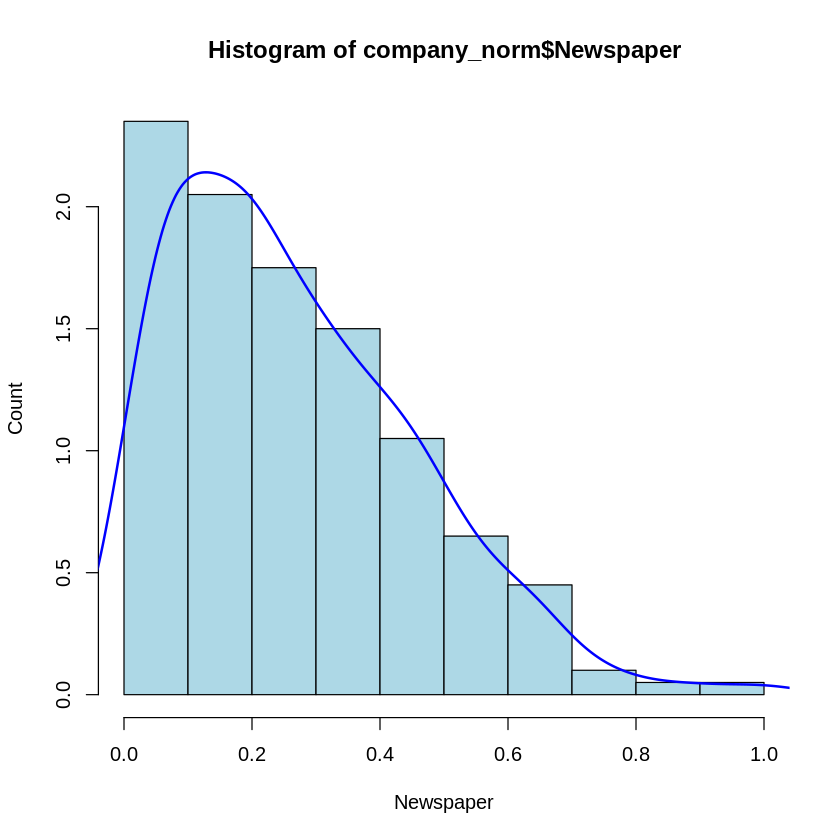

In [98]:
# Plotting histogram and kernel density estimates

#define Min-Max normalization function
min_max_norm <- function(x) {
    (x - min(x)) / (max(x) - min(x))
  }

#apply Min-Max normalization to first four columns in iris dataset
company_norm <- as.data.frame(lapply(companyDF[1:4], min_max_norm))

hist(company_norm$Sales, 
     col="lightblue",
     border="black",
     prob = TRUE,
     ylab = "Count",
     xlab = "Sales",
     breaks = 10)
  
lines(density(company_norm$Sales),
      lwd = 2,
      col = "blue")

hist(company_norm$TV, 
     col="lightblue",
     border="black",
     prob = TRUE,
     ylab = "Count",
     xlab = "TV",
     breaks = 10)
  
lines(density(company_norm$TV),
      lwd = 2,
      col = "blue")

hist(company_norm$Radio, 
     col="lightblue",
     border="black",
     prob = TRUE,
     ylab = "Count",
     xlab = "Radio",
     breaks = 10)
  
lines(density(company_norm$Radio),
      lwd = 2,
      col = "blue")

hist(company_norm$Newspaper, 
     col="lightblue",
     border="black",
     prob = TRUE,
     ylab = "Count",
     xlab = "Newspaper",
     breaks = 10)
  
lines(density(company_norm$Newspaper),
      lwd = 2,
      col = "blue")


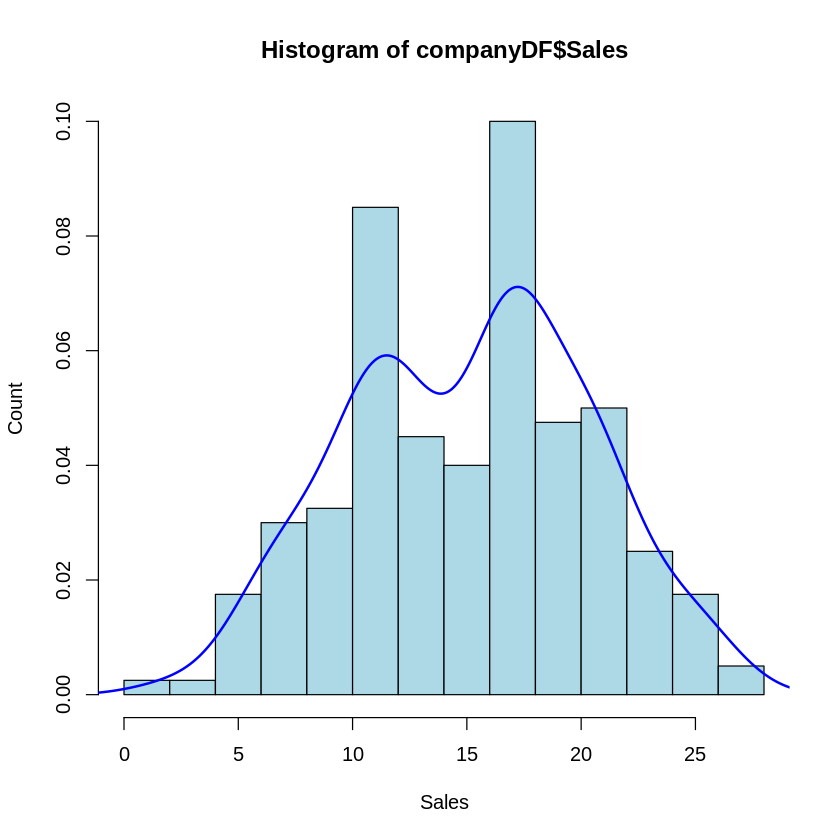

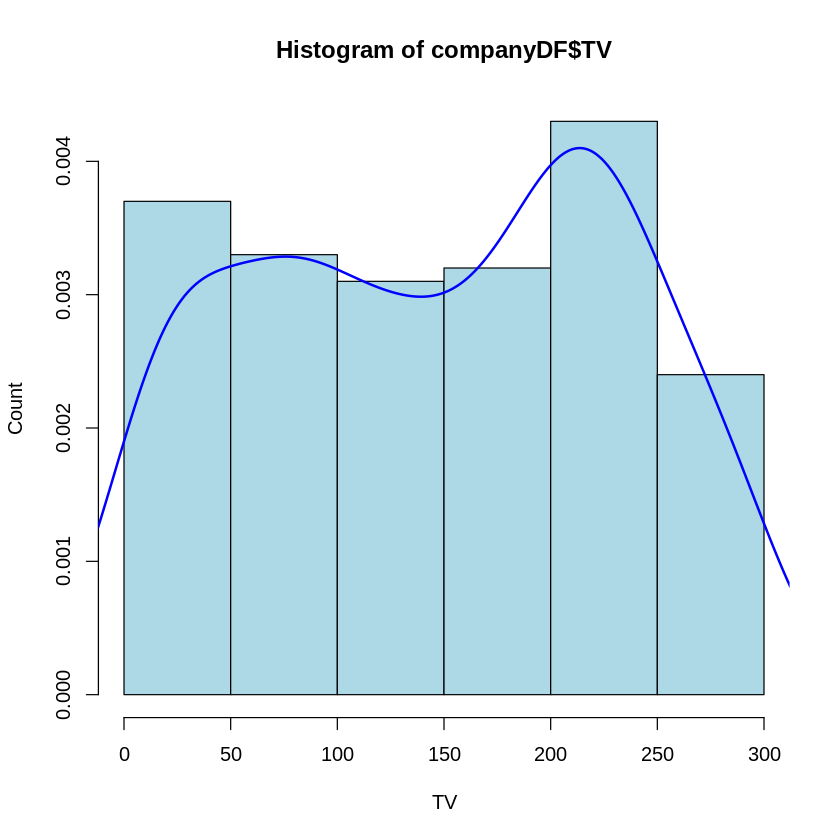

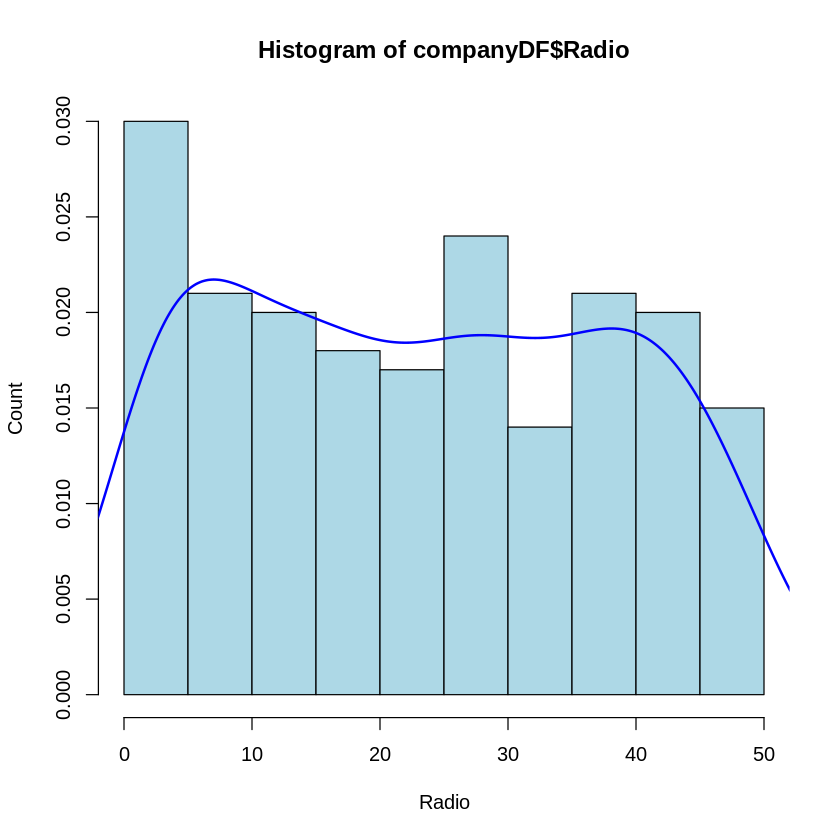

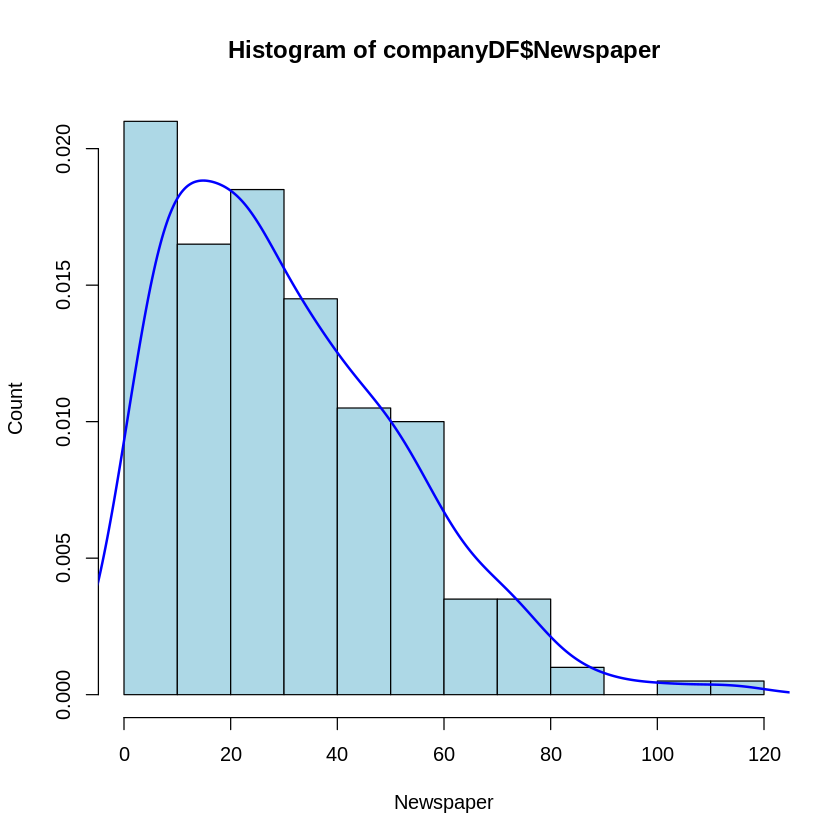

In [97]:
# Same but without normalization

hist(companyDF$Sales, 
     col="lightblue",
     border="black",
     prob = TRUE,
     ylab = "Count",
     xlab = "Sales",
     breaks = 10)
  
lines(density(companyDF$Sales),
      lwd = 2,
      col = "blue")

hist(companyDF$TV, 
     col="lightblue",
     border="black",
     prob = TRUE,
     ylab = "Count",
     xlab = "TV",
     breaks = 10)
  
lines(density(companyDF$TV),
      lwd = 2,
      col = "blue")

hist(companyDF$Radio, 
     col="lightblue",
     border="black",
     prob = TRUE,
     ylab = "Count",
     xlab = "Radio",
     breaks = 10)
  
lines(density(companyDF$Radio),
      lwd = 2,
      col = "blue")

hist(companyDF$Newspaper, 
     col="lightblue",
     border="black",
     prob = TRUE,
     ylab = "Count",
     xlab = "Newspaper",
     breaks = 10)
  
lines(density(companyDF$Newspaper),
      lwd = 2,
      col = "blue")

In [96]:
# Count of missing values

sum(is.na(companyDF))


[1] 0

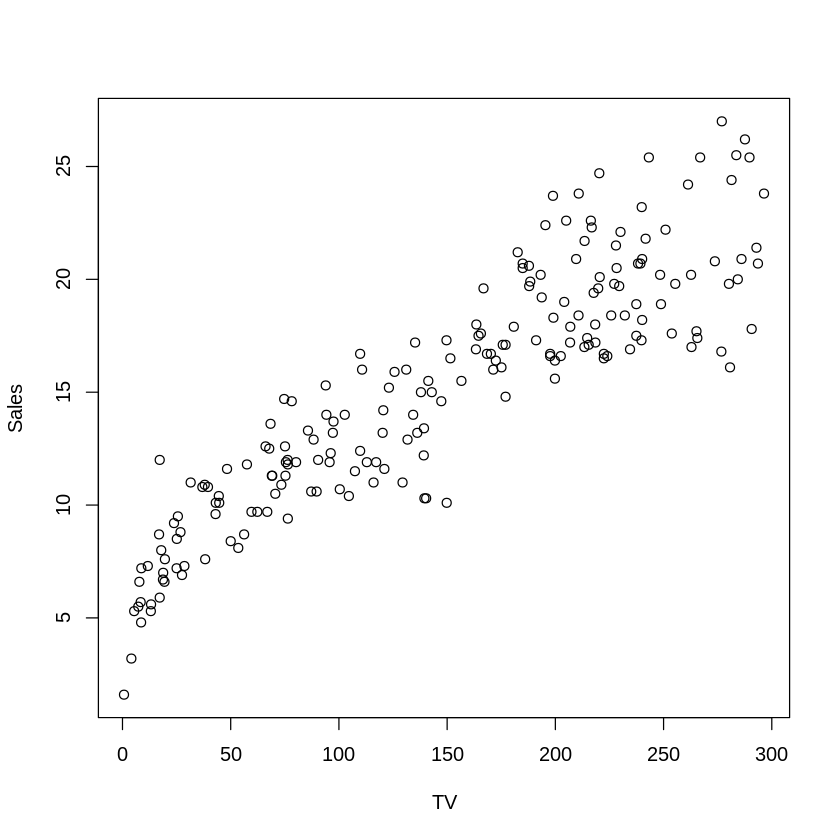

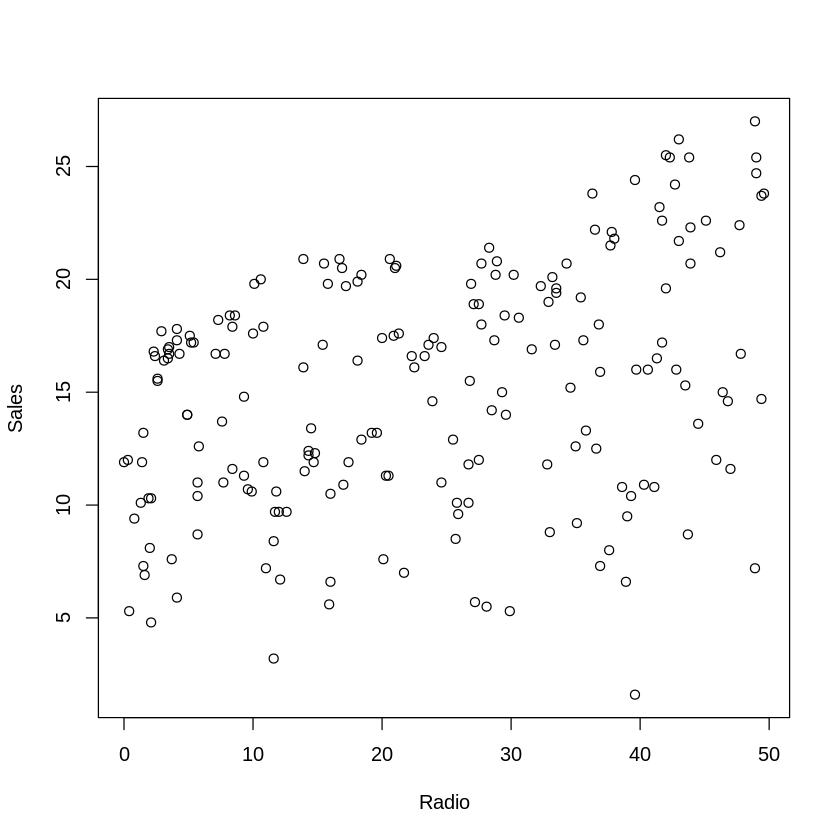

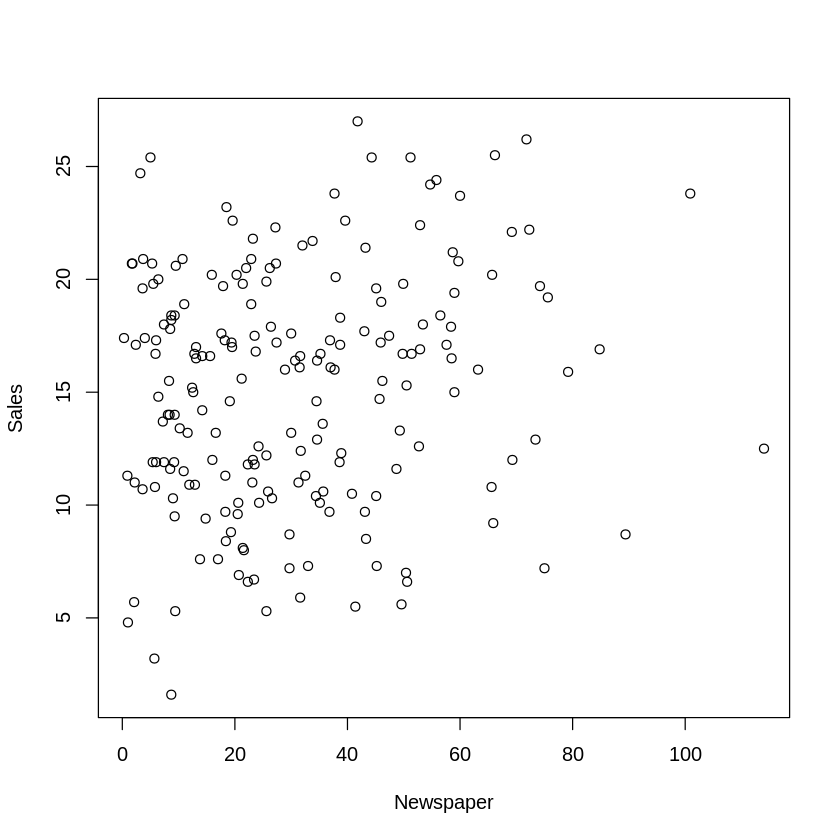

In [95]:
# Linear regression model for each variable with Sales as Y-axis

plot(companyDF$TV, companyDF$Sales, xlab="TV", ylab="Sales")
plot(companyDF$Radio, companyDF$Sales, xlab="Radio", ylab="Sales")
plot(companyDF$Newspaper, companyDF$Sales, xlab="Newspaper", ylab="Sales")

In [78]:
# Linear Regression model between TV and Sales

lr = lm(companyDF$Sales~companyDF$TV, data = companyDF)

print("Intercept:")
coef(lr)["(Intercept)"]
print("Slope:")
coef(lr)["companyDF$TV"]


[1] "Intercept:"


(Intercept) 
   6.974821

[1] "Slope:"


companyDF$TV 
  0.05546477

In [94]:
# Find R2 and MSE values of lr

print("R2 score:")
summary(lr)$r.squared

print("Mean squared error:")
anova(lr)['Residuals', 'Mean Sq']

# Linear Model: Sales = 6.97 + 0.05 * TV

[1] "R2 score:"


[1] 0.8121757

[1] "Mean squared error:"


[1] 5.270448

In [38]:
# Split data into training and testing sets

# 70% of the sample size
smp_size <- floor(0.7 * nrow(companyDF))

# set the seed to make partition reproducible
set.seed(100)
train_ind <- sample(seq_len(nrow(companyDF)), size = smp_size)

train <- companyDF[train_ind, ]
test <- companyDF[-train_ind, ]


In [108]:
# Train portion

dim(train)


[1] 140   1

In [109]:
# Test portion

dim(test)


[1] 60  1

In [39]:
# Create model

lr2 = lm(train$Sales~train$TV, data = train)

print("Intercept:")
coef(lr2)["(Intercept)"]
print("Slope:")
coef(lr2)["train$TV"] 

[1] "Intercept:"


(Intercept) 
   7.167843

[1] "Slope:"


train$TV 
0.05406196

In [58]:
# Find R2 and MSE values of lr

print("R2 score:")
summary(lr2)$r.squared

print("Mean squared error:")
anova(lr2)['Residuals', 'Mean Sq']

# Linear Model: Sales = 6.97 + 0.05 * TV

[1] "R2 score:"


[1] 0.807109

[1] "Mean squared error:"


[1] 5.197207

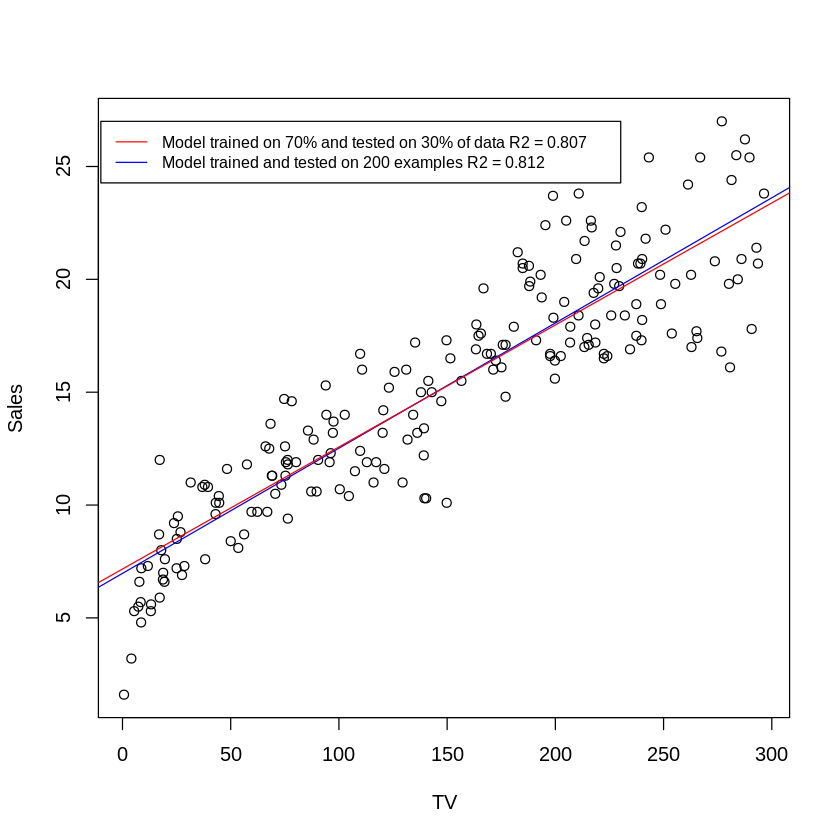

In [75]:
# Plot the best fit for linear models

plot(companyDF$TV, companyDF$Sales, xlab = "TV", ylab = "Sales", )
abline(lr, col="blue")
abline(lr2, col="red")

legend(-10, 27, legend=c("Model trained on 70% and tested on 30% of data R2 = 0.807", "Model trained and tested on 200 examples R2 = 0.812"),
       col=c("red", "blue"), lty=1:1, cex=0.8)

In [77]:
# Sales vs. TV, Radio, and Newspaper

lr3 = lm(companyDF$Sales~companyDF$TV + companyDF$Radio + companyDF$Newspaper, data = companyDF)

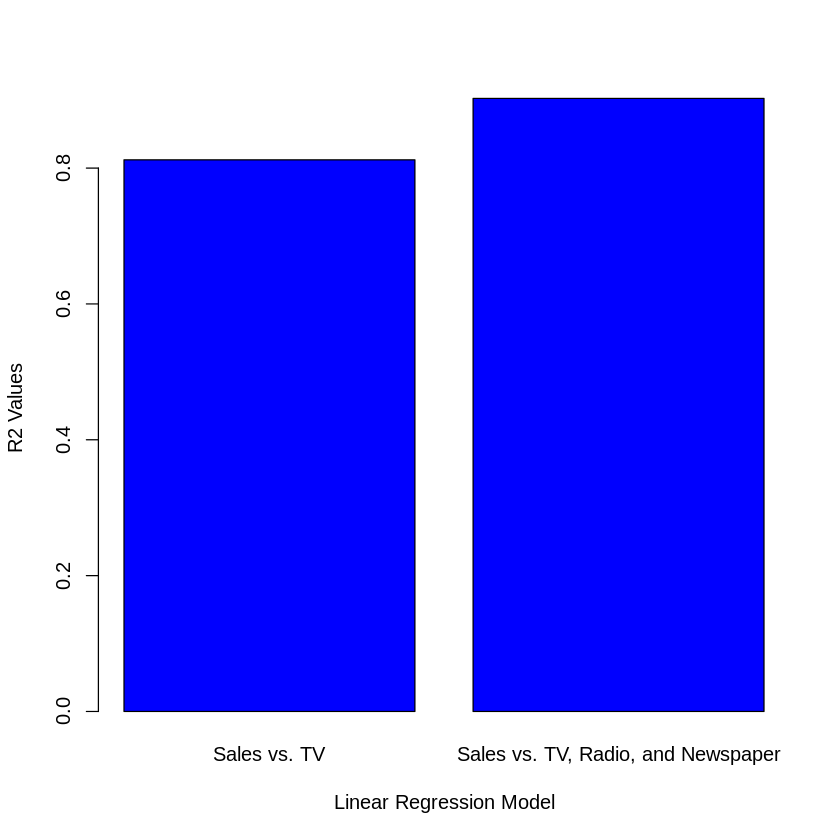

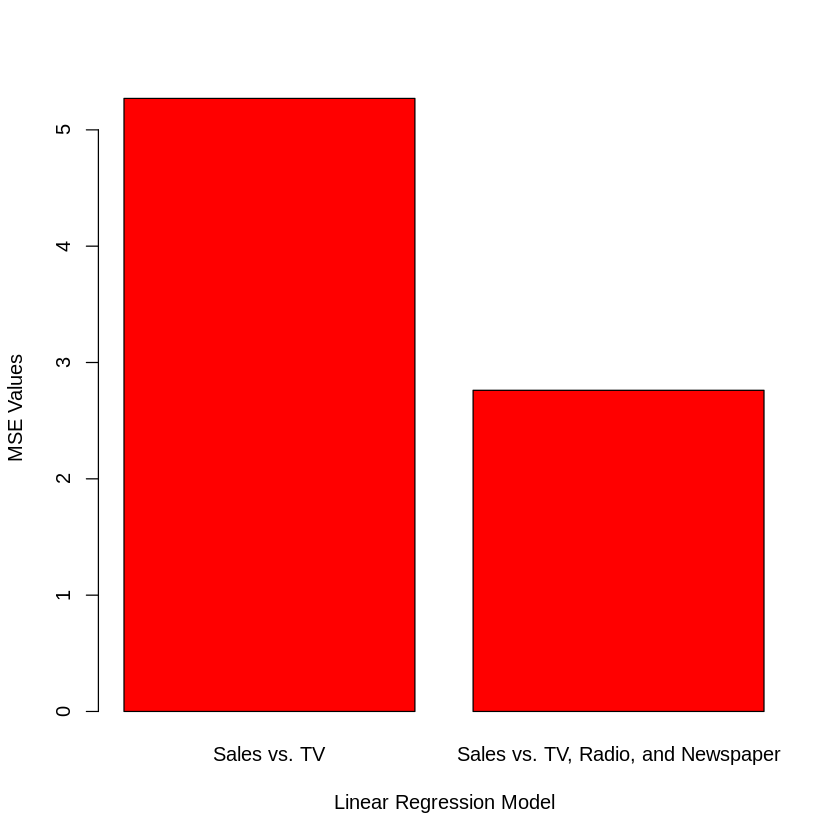

In [93]:
# Plot R2 and MSE for Sales vs. TV and Sales vs. TV, Radio, and Newspaper

lr_R2 <- summary(lr)$r.squared
lr_MSE <- anova(lr)['Residuals', 'Mean Sq']

lr3_R2 <- summary(lr3)$r.squared
lr3_MSE <- anova(lr3)['Residuals', 'Mean Sq']

R2_values <- c(lr_R2, lr3_R2)

barplot(R2_values, 
        names.arg = c("Sales vs. TV", "Sales vs. TV, Radio, and Newspaper"), 
        xlab = "Linear Regression Model", 
        ylab = "R2 Values", 
        col = "blue")

MSE_values <- c(lr_MSE, lr3_MSE)

barplot(MSE_values, 
        names.arg = c("Sales vs. TV", "Sales vs. TV, Radio, and Newspaper"), 
        xlab = "Linear Regression Model", 
        ylab = "MSE Values", 
        col = "red")